### Time Series Decomposition

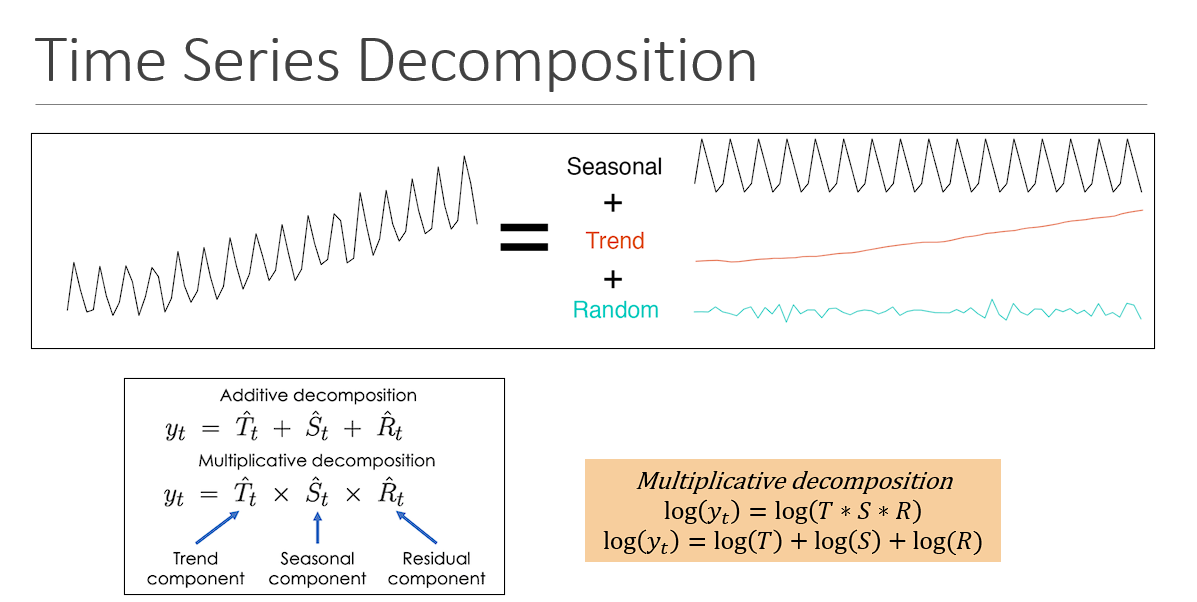

In [30]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pmdarima

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [33]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [35]:
df.isna().sum()

#Passengers    0
dtype: int64

### change the column name

In [36]:
df.columns = ['nPass']
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [37]:
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### visuaalizing the data

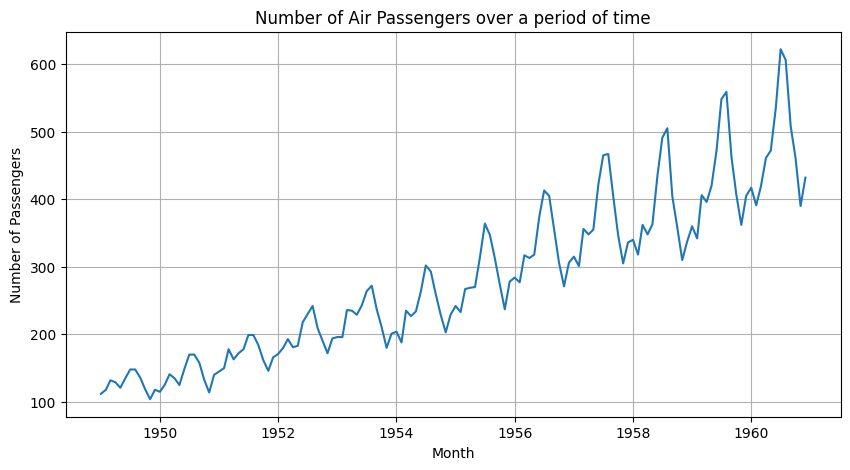

In [38]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers over a period of time')
plt.grid()
plt.show()

## Create a time series decomposition

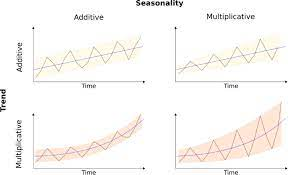

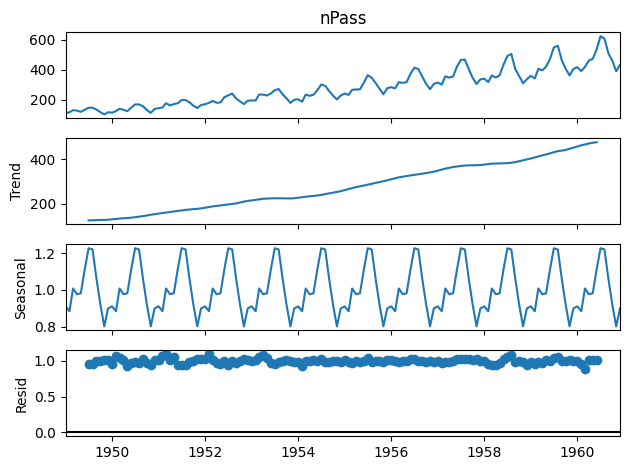

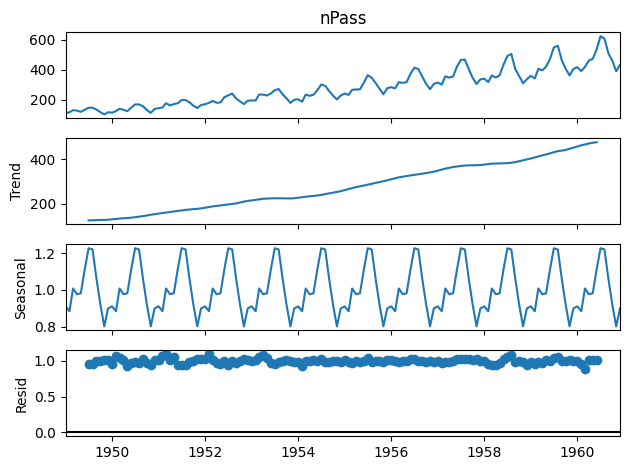

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['nPass'], model='multiplicative')
Q.plot()

In [40]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: nPass, Length: 144, dtype: float64

In [41]:
Q.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [42]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [43]:
Q.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

## Plotting trend

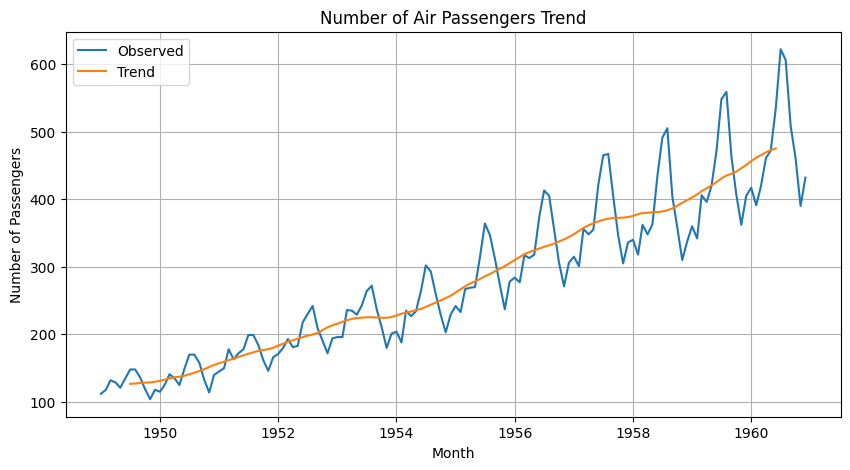

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'], label='Observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.legend()
plt.show()

### Seasonal plot

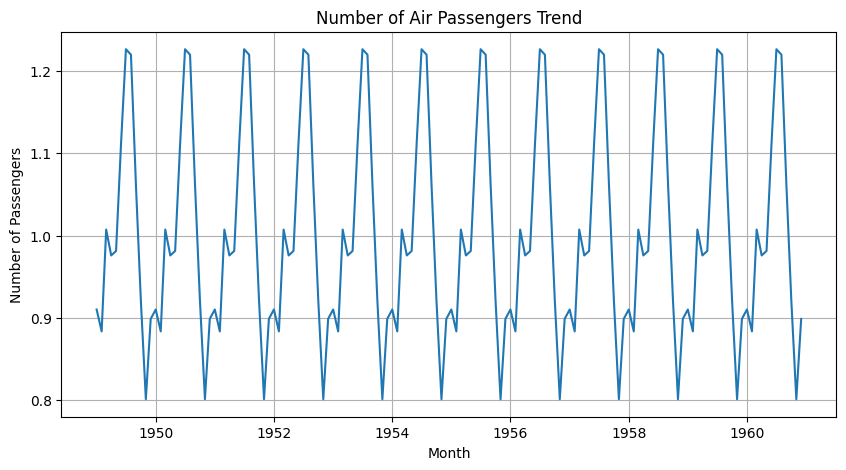

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()

### plot the residuals

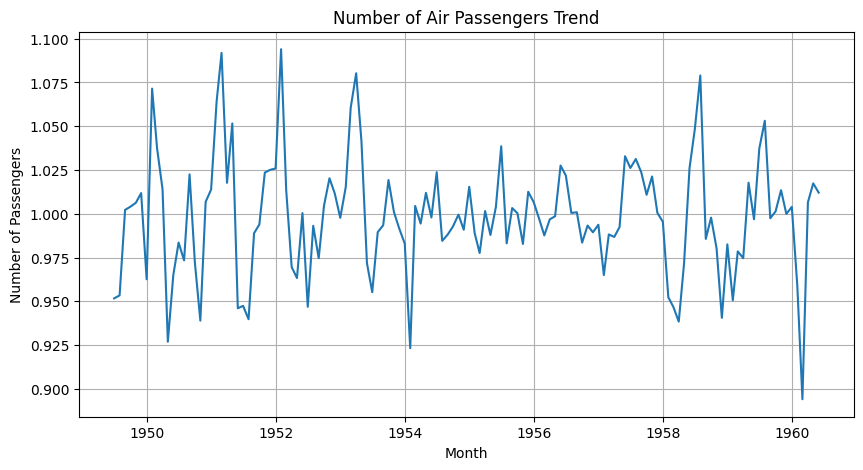

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()

### Time series forecasting



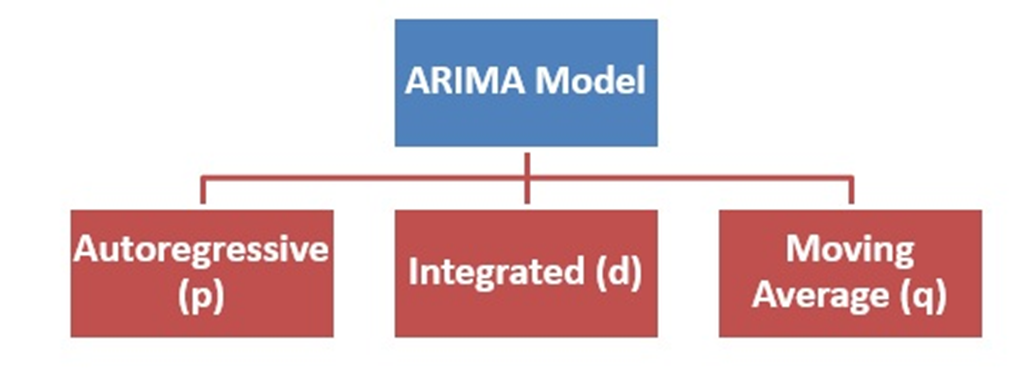

## Forecast next 3 years data - 3*12 = 36 months

In [47]:
from pmdarima.arima import auto_arima
model = auto_arima(df['nPass'], m=12, seasonal=True)

In [48]:
model.order

(2, 1, 1)

## Forecasting

In [49]:
forecast, conf = model.predict(n_periods=36, return_conf_int=True)

In [50]:
forecast

1961-01-01    445.634991
1961-02-01    420.395103
1961-03-01    449.198451
1961-04-01    491.840095
1961-05-01    503.394633
1961-06-01    566.862610
1961-07-01    654.260334
1961-08-01    638.597642
1961-09-01    540.883890
1961-10-01    494.126763
1961-11-01    423.332843
1961-12-01    465.507703
1962-01-01    479.291063
1962-02-01    454.177067
1962-03-01    483.087234
1962-04-01    525.819514
1962-05-01    537.450958
1962-06-01    600.984190
1962-07-01    688.437283
1962-08-01    672.821572
1962-09-01    575.147683
1962-10-01    528.424380
1962-11-01    457.659160
1962-12-01    499.858372
1963-01-01    513.662395
1963-02-01    488.565931
1963-03-01    517.490975
1963-04-01    560.235877
1963-05-01    571.878032
1963-06-01    635.420351
1963-07-01    722.881156
1963-08-01    707.271987
1963-09-01    609.603650
1963-10-01    562.885057
1963-11-01    492.123834
1963-12-01    534.326437
Freq: MS, dtype: float64

In [51]:
conf

array([[423.34487759, 467.92510471],
       [394.23551428, 446.55469252],
       [419.83188992, 478.56501199],
       [460.37649263, 523.3036964 ],
       [470.38073086, 536.40853522],
       [532.6996341 , 601.02558583],
       [619.22147403, 689.2991947 ],
       [602.88020044, 674.31508414],
       [504.63159492, 577.13618588],
       [457.44624137, 530.80728383],
       [386.30414338, 460.361543  ],
       [428.19161369, 502.82379164],
       [433.49782381, 525.08430198],
       [405.10923684, 503.2448968 ],
       [431.15603588, 535.01843199],
       [471.84098531, 579.79804326],
       [481.87404375, 593.02787316],
       [544.15707729, 657.81130293],
       [630.60926527, 746.26530151],
       [614.17967749, 731.46346653],
       [515.83290928, 634.46245755],
       [468.5446067 , 588.30415285],
       [397.29775817, 518.02056239],
       [439.08041924, 560.63632426],
       [446.32772851, 580.99706096],
       [418.31885906, 558.81300308],
       [444.62493726, 590.35701177],
 

In [52]:
df_forecast = pd.DataFrame(forecast)
df_forecast.columns = ['Forecast']
df_forecast

,Forecast
1961-01-01,445.634991
1961-02-01,420.395103
1961-03-01,449.198451
1961-04-01,491.840095
1961-05-01,503.394633
1961-06-01,566.862610
1961-07-01,654.260334
1961-08-01,638.597642
1961-09-01,540.883890
1961-10-01,494.126763


In [53]:

df_forecast[['Lower', 'Upper']] = conf


In [54]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,445.634991,423.344878,467.925105
1961-02-01,420.395103,394.235514,446.554693
1961-03-01,449.198451,419.831890,478.565012
1961-04-01,491.840095,460.376493,523.303696
1961-05-01,503.394633,470.380731,536.408535
1961-06-01,566.862610,532.699634,601.025586
1961-07-01,654.260334,619.221474,689.299195
1961-08-01,638.597642,602.880200,674.315084
1961-09-01,540.883890,504.631595,577.136186
1961-10-01,494.126763,457.446241,530.807284


In [55]:
df_forecast = df_forecast.apply(round)

In [56]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


### Visualize above forecast

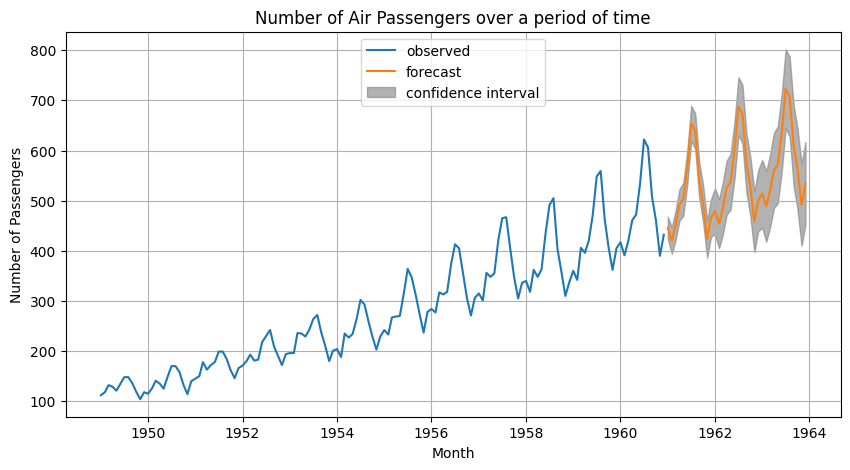

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'], label='observed')
plt.plot(df_forecast['Forecast'], label='forecast')
plt.fill_between(x=df_forecast.index, y1=df_forecast['Lower'], y2=df_forecast['Upper'], color='gray', alpha=0.6, label='confidence interval')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers over a period of time')
plt.grid()
plt.legend(loc='upper center')
plt.show()

### Save above results to csv

In [58]:
df_forecast.to_csv('ARIMAResults.csv')

In [59]:
A = 5
b = 5
A+b

10